In [1]:
%pip install transformers

Looking in indexes: https://nexus.iisys.de/repository/ki-awz-pypi-group/simple, https://pypi.org/simple
  Obtaining dependency information for transformers from https://files.pythonhosted.org/packages/51/51/b87caa939fedf307496e4dbf412f4b909af3d9ca8b189fc3b65c1faa456f/transformers-4.46.3-py3-none-any.whl.metadata
  Using cached transformers-4.46.3-py3-none-any.whl.metadata (44 kB)
  Obtaining dependency information for filelock from https://files.pythonhosted.org/packages/b9/f8/feced7779d755758a52d1f6635d990b8d98dc0a29fa568bbe0625f18fdf3/filelock-3.16.1-py3-none-any.whl.metadata
  Using cached filelock-3.16.1-py3-none-any.whl.metadata (2.9 kB)
  Obtaining dependency information for huggingface-hub<1.0,>=0.23.2 from https://files.pythonhosted.org/packages/60/bf/cea0b9720c32fa01b0c4ec4b16b9f4ae34ca106b202ebbae9f03ab98cd8f/huggingface_hub-0.26.2-py3-none-any.whl.metadata
  Using cached huggingface_hub-0.26.2-py3-none-any.whl.metadata (13 kB)
  Obtaining dependency information for regex!=20

In [2]:
%pip install 'accelerate>=0.26.0'

Looking in indexes: https://nexus.iisys.de/repository/ki-awz-pypi-group/simple, https://pypi.org/simple
  Obtaining dependency information for accelerate>=0.26.0 from https://files.pythonhosted.org/packages/d1/d5/0050b2820a1e709ffa623f9a9e8ae42d0903535f2150613cbfeb7f16932a/accelerate-1.1.1-py3-none-any.whl.metadata
  Using cached accelerate-1.1.1-py3-none-any.whl.metadata (19 kB)
  Obtaining dependency information for torch>=1.10.0 from https://files.pythonhosted.org/packages/2a/ef/834af4a885b31a0b32fff2d80e1e40f771e1566ea8ded55347502440786a/torch-2.5.1-cp310-cp310-manylinux1_x86_64.whl.metadata
  Using cached torch-2.5.1-cp310-cp310-manylinux1_x86_64.whl.metadata (28 kB)
  Obtaining dependency information for typing-extensions>=3.7.4.3 from https://files.pythonhosted.org/packages/26/9f/ad63fc0248c5379346306f8668cda6e2e2e9c95e01216d2b8ffd9ff037d0/typing_extensions-4.12.2-py3-none-any.whl.metadata
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Obtaining dep

In [3]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

2024-11-24 22:53:06.319627: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-24 22:53:06.357781: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
model = AutoModelForCausalLM.from_pretrained(
    "microsoft/Phi-3-mini-128k-instruct",
    device_map="cuda",
    torch_dtype="auto",
    trust_remote_code=True,
)

`flash-attention` package not found, consider installing for better performance: No module named 'flash_attn'.
Current `flash-attention` does not support `window_size`. Either upgrade or use `attn_implementation='eager'`.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [5]:
def get_color_from_description(description):
    response = pipe(description, **generation_args)
    return response[0]

### number of max new tokens = 50. for 1 sentence test

In [6]:
tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3-mini-128k-instruct")
pipe = pipeline('text-generation', model=model, tokenizer=tokenizer,)

generation_args = {
    "max_new_tokens": 50,
    "return_full_text": False,
    "temperature": 0.9,
    "do_sample": True,
}

In [7]:
description = "Sunny day at the beach. Output a color as a hex format"
print(get_color_from_description(description))

The `seen_tokens` attribute is deprecated and will be removed in v4.41. Use the `cache_position` model input instead.
`get_max_cache()` is deprecated for all Cache classes. Use `get_max_cache_shape()` instead. Calling `get_max_cache()` will raise error from v4.48
You are not running the flash-attention implementation, expect numerical differences.


{'generated_text': '. (no input)\n\nOutput:#E0F7FA\n\nExplanation: \n\nThe color code #E0F7FA represents a light sky blue color, which is perfect for a sunny day at the'}


### number of max new tokens = 500. for multiple sentences

In [8]:
tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3-mini-128k-instruct")
pipe = pipeline('text-generation', model=model, tokenizer=tokenizer,)

generation_args = {
    "max_new_tokens": 500,
    "return_full_text": False,
    "temperature": 0.9,
    "do_sample": True,
}

In [9]:

description = """
When you were here before, couldn't look you in the eye
You're just like an angel, your skin makes me cry
You float like a feather in a beautiful world
I wish I was special, you're so fuckin' special

But I'm a creep, I'm a weirdo
What the hell am I doin' here?
I don't belong here

I don't care if it hurts, I wanna have control
I want a perfect body, I want a perfect soul
I want you to notice when I'm not around
You're so fuckin' special, I wish I was special

But I'm a creep, I'm a weirdo
What the hell am I doin' here?
I don't belong here
Oh-oh, oh-oh

She's runnin' out the door
She's runnin' out
She run, run, run, run
Run
Whatever makes you happy, whatever you want
You're so fuckin' special, I wish I was special
But I'm a creep, I'm a weirdo
What the hell am I doin' here?
I don't belong here
I don't belong here. 
Output a color each line as a hex format, in JSON"""
output_data = get_color_from_description(description)
print(output_data)

{'generated_text': ', with each line\'s emotion linked to a color. Emotions: Lonely (\'#A0C0FC\'), Confused (\'#FFCCCE\'), Jealous (\'#84A4CC\'), Loving (\'#FFFAFA\'), Guilty (\'#E1DBFD\'), Hopeless (\'#D7B2C1\'), Desperate (\'#FFD7C0\'), Wistful (\'#E3C0C1\'), Apologetic (\'#DCDCDE\'), Regretful (\'#C6D1C4\'). \n\nOutput JSON:\n```json\n{\n  "Lonely": "#A0C0FC",\n  "She\'s runnin\' out the door": "#D7B2C1",\n  "You\'re so fuckin\' special, I wish I was special": "#DCDCDE",\n  "But I\'m a creep, I\'m a weirdo": "#DCDCDE",\n  "What the hell am I doin\' here?": "#DCDCDE",\n  "I don\'t belong here": "#DCDCDE",\n  "I don\'t belong here": "#DCDCDE",\n  "Whatever makes you happy, whatever you want": "#FFD7C0",\n  "You\'re so fuckin\' special, I wish I was special": "#DCDCDE"\n}\n``` \nReplace exact lines with color codes representing corresponding emotions.\nOutput: ```json\n{\n  "Lonely": "#A0C0FC",\n  "She\'s runnin\' out the door": "#D7B2C1",\n  "You\'re so fuckin\' special, I wish I was 

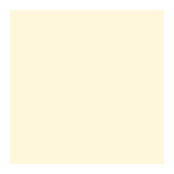

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Hex color code
hex_color = "#FFF7DC"

# Create a 10x10 array of zeros
data = np.zeros((10, 10, 3), dtype=np.float32)

# Convert hex color to RGB values normalized between 0 and 1
rgb_color = tuple(int(hex_color[i:i+2], 16)/255 for i in (1, 3, 5))

# Set all pixels in the array to the desired color
data[:, :] = rgb_color

# Display the color
plt.figure(figsize=(2, 2))
plt.imshow(data)
plt.axis('off')
plt.show()
